In [1]:
import os
import sys; 
sys.path.extend(['/home/meet/FlowMatchingTests/conditional-flow-matching/'])
sys.path.extend(['..'])
import numpy as np
import matplotlib.pyplot as plt
from resdiual import calculate_kuramoto_sivashinsky_residual, two_point_corr

In [2]:
fid = "high" 
data = np.load(f"/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/multi_fidelity/synthetic/ks/{fid}_fid.npy")
test_data = np.load(f"/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/multi_fidelity/synthetic/ks/{fid}_fid_test.npy")
m, std = data.mean(axis=(0,2,3), keepdims=True), data.std(axis=(0,2,3), keepdims=True)
X = (test_data - m)/std

# Flow_daps

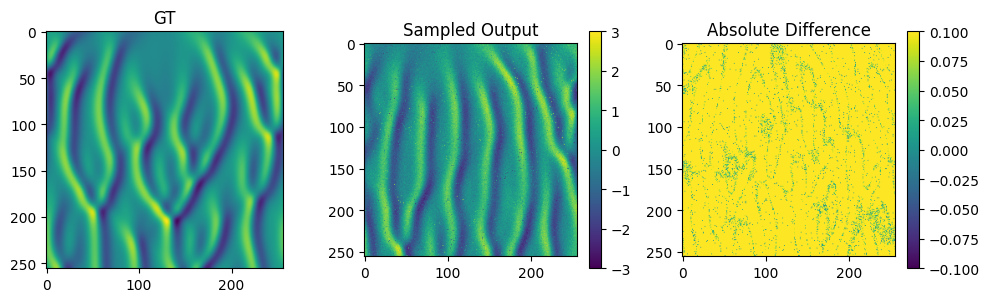

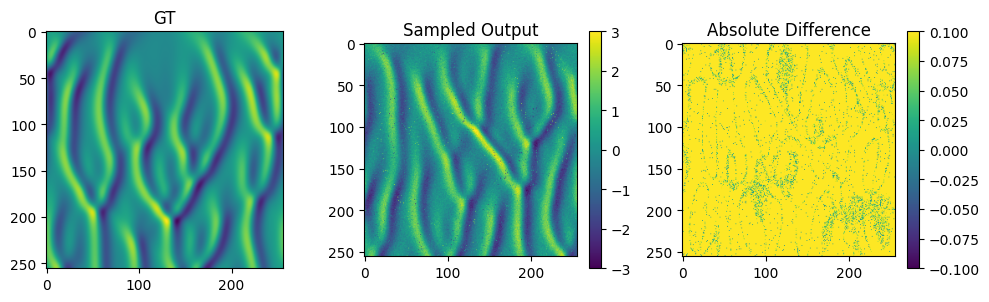

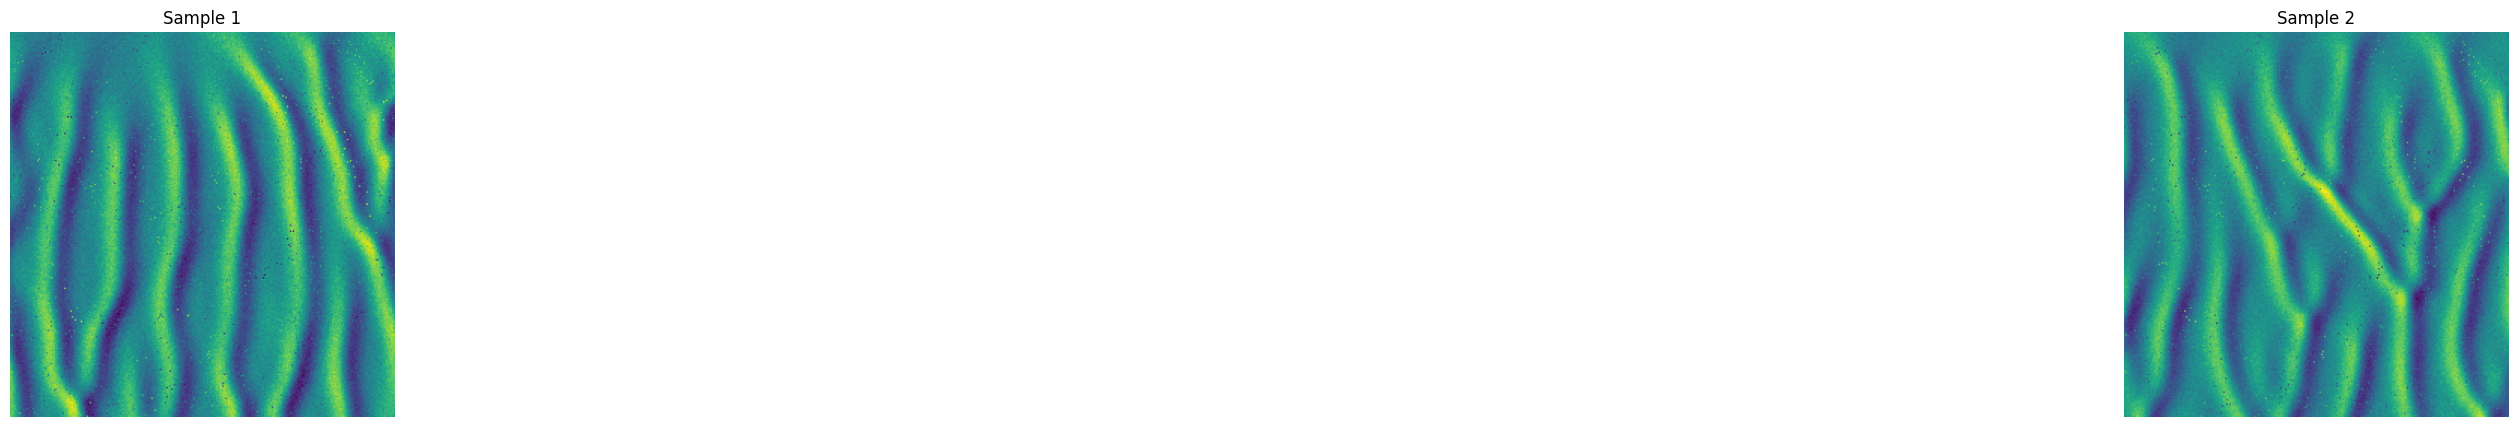

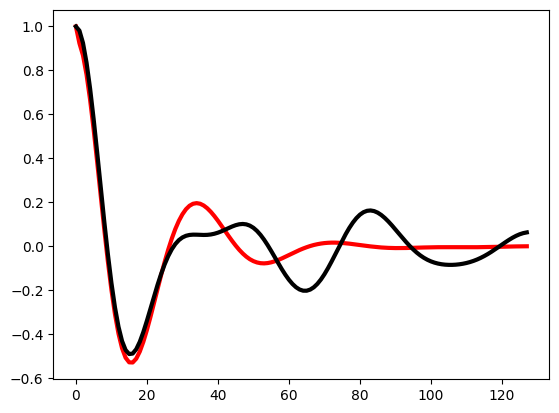

[455.53217 462.97586 466.19952 455.21664 474.55637 444.28116 451.93164
 460.85883 454.393   482.2066  470.926   456.71332 444.07443 461.96664
 473.2953  460.94473 465.68237 480.402   425.6889  460.43875 472.28033
 432.103   465.9914  473.2855  459.22134 485.332   459.3558  421.46564
 430.418   454.86862 483.69742 442.50092 489.70078 448.00537 453.00204
 471.70255 460.03143 479.25815 446.03134 447.28006 437.85507 479.2371
 453.8953  473.49997 457.3611  403.09576 454.2538  444.04437 444.58612
 480.2878  464.92783 457.57574 454.72522 450.34824 443.95087 451.09375
 455.32944 485.8826  475.14093 428.59192 444.8679  478.178   473.63043
 474.12393 479.58447 453.71    476.01025 479.93796 468.92026 458.76
 475.36194 418.11673 475.6606  499.80536 454.38406 468.85342 424.09464
 438.0935  471.20685 476.76834 434.75272 467.08728 447.0413  443.9465
 476.70554 473.94296 430.77185 425.04898 438.40814 446.24298 490.01837
 492.18027 448.21765 465.44366 488.31915 471.9461  465.62375 443.37634
 452.75735 

In [8]:
samples_daps = np.load("/ehome/yaqin/conditional-flow-matching/physics_flow_matching/multi_fidelity/analysis/inverse_problems/KS-equation/meas_func2/flow_dapsstep200nonoise.npy")

for i in range(2):
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    axes[0].imshow(X[1, 0], vmax=3, vmin=-3)
    axes[0].set_title('GT')
    a = axes[1].imshow(samples_daps[i, 0], vmax=3, vmin=-3)
    axes[1].set_title('Sampled Output')
    fig.colorbar(ax=axes[1], mappable=a, fraction = 0.05)
    b = axes[2].imshow(np.abs(X[1, 0] - samples_daps[i, 0]), vmax=0.1, vmin=-0.1)
    axes[2].set_title('Absolute Difference')
    fig.colorbar(ax=axes[2], mappable=b, fraction = 0.05)
    plt.tight_layout()
    plt.show()
    
fig, axes = plt.subplots(1, 2, figsize=(50, 5))
for i in range(2):
    axes[i].imshow(samples_daps[i, 0])
    axes[i].set_title(f'Sample {i+1}')
    axes[i].axis('off')
    
corr_grad = []
for s in (samples_daps):
    corr_grad.append(two_point_corr(s[0], np.arange(256), 0, 1)[-1])
corr_grad = np.stack(corr_grad, axis=0)
# for i in range(20):
#     plt.plot(np.arange(128), corr_mcmc[i], label='MCMC')
plt.figure()
plt.plot(np.arange(128), corr_grad.mean(axis=0), label='MCMC Mean', color='red', linewidth=3)
plt.plot(np.arange(128), two_point_corr(X[1,0], np.arange(256), 0, 1)[-1], label='GT', linewidth=3, color='black')
plt.show()
res = calculate_kuramoto_sivashinsky_residual((samples_daps * std + m)[:, 0], 0.2,0.245)
# np.save("flow_dapsstep200nonoise_res.npy",res)
print(res)


# DPMC

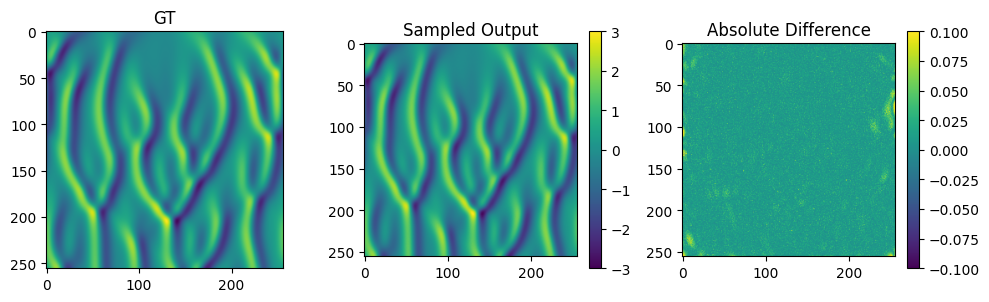

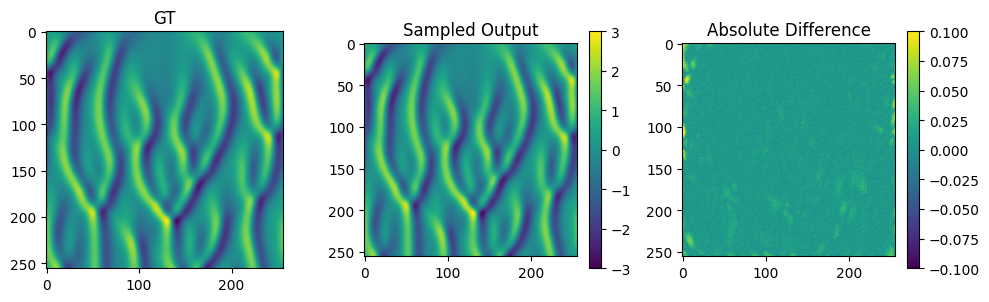

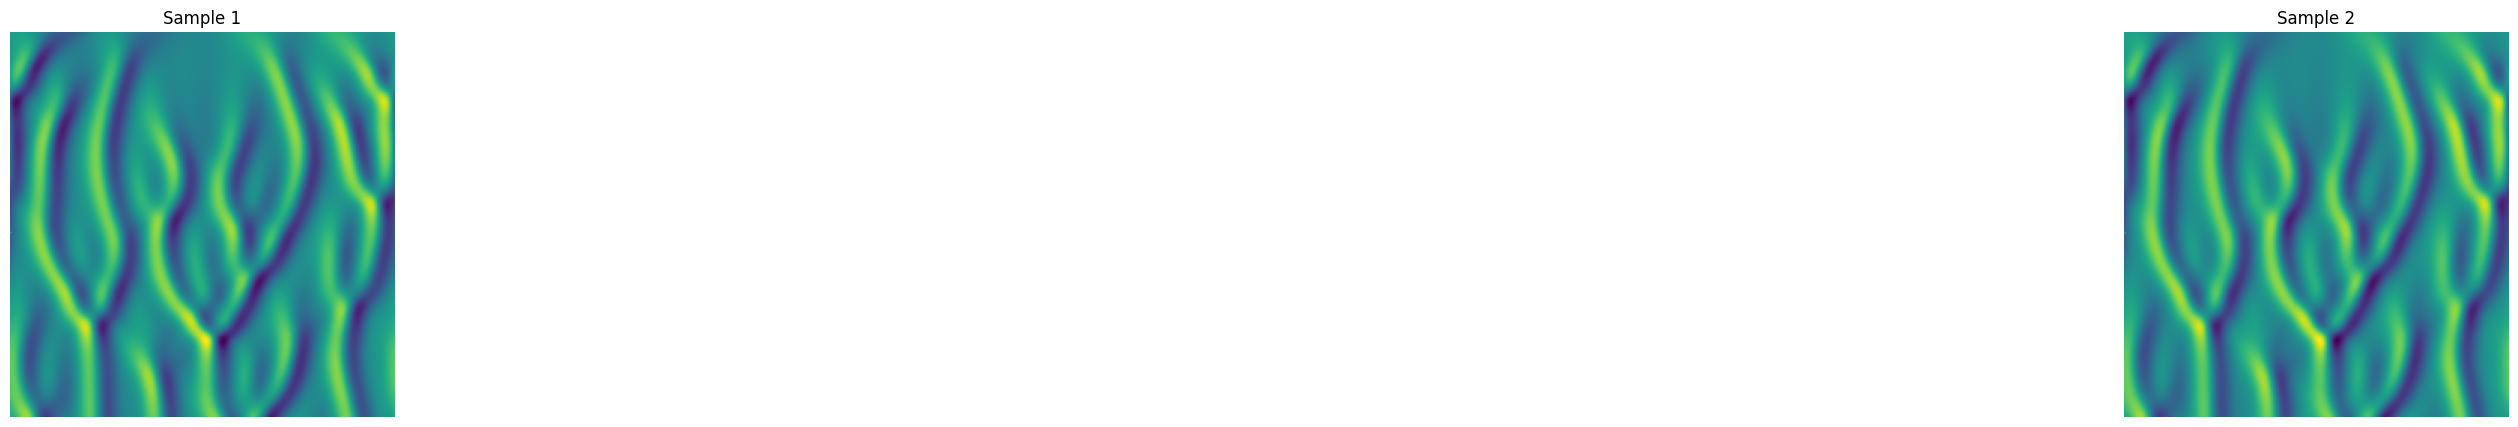

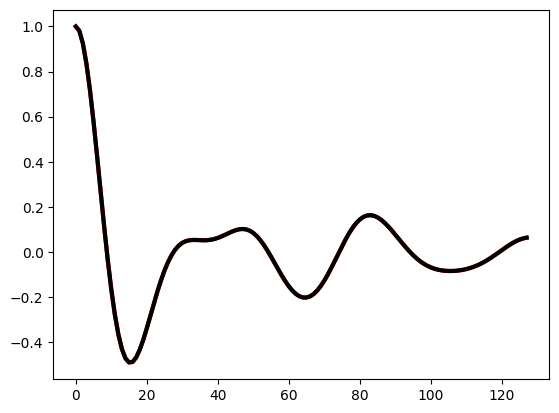

[29.768549 22.539831 29.72427  29.01134  27.322544 33.967995 28.955654
 31.791836 27.317554 30.897774 28.9868   24.654415 25.126085 29.399078
 28.25673  29.715208 27.040184 24.439568 27.396544 32.464134 28.371151
 30.15707  37.04512  30.500727 31.585005 33.495327 24.418823 28.533468
 22.505648 36.226444 28.032093 35.248272 30.003815 31.244476 27.305767
 26.541698 24.553719 27.22134  26.306524 28.451427 27.719929 31.382336
 29.144367 29.42504  31.469027 25.094494 20.241108 30.199131 26.88414
 31.247633 31.813807 25.895596 31.239054 25.00778  28.178541 31.17619
 33.54404  30.42411  27.675825 33.171127 32.54874  20.167137 26.696152
 27.454958 26.544043 30.386148 31.490282 27.854433 35.952427 33.326942
 27.274809 24.77265  22.799635 26.030447 20.293793 32.601475 36.013313
 33.44986  26.41486  33.21506  26.180922 29.816458 25.074354 23.032415
 34.79334  30.661442 23.284128 27.580908 25.089054 27.66899  32.00418
 26.122694 30.641384 26.482506 22.011457 24.704763 27.209501 37.47225
 28.583727

In [10]:
samples_cond_grad_dpmc = np.load("/ehome/yaqin/conditional-flow-matching/physics_flow_matching/multi_fidelity/analysis/inverse_problems/KS-equation/meas_func2/dpmcstep100nonoise.npy")
for i in range(2):
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    axes[0].imshow(X[1, 0], vmax=3, vmin=-3)
    axes[0].set_title('GT')
    a = axes[1].imshow(samples_cond_grad_dpmc[i, 0], vmax=3, vmin=-3)
    axes[1].set_title('Sampled Output')
    fig.colorbar(ax=axes[1], mappable=a, fraction = 0.05)
    b = axes[2].imshow(np.abs(X[1, 0] - samples_cond_grad_dpmc[i, 0]), vmax=0.1, vmin=-0.1)
    axes[2].set_title('Absolute Difference')
    fig.colorbar(ax=axes[2], mappable=b, fraction = 0.05)
    plt.tight_layout()
    plt.show()
    
fig, axes = plt.subplots(1, 2, figsize=(50, 5))
for i in range(2):
    axes[i].imshow(samples_cond_grad_dpmc[i, 0])
    axes[i].set_title(f'Sample {i+1}')
    axes[i].axis('off')
    
    
corr_grad = []
for s in (samples_cond_grad_dpmc):
    corr_grad.append(two_point_corr(s[0], np.arange(256), 0, 1)[-1])
corr_grad = np.stack(corr_grad, axis=0)
# for i in range(20):
#     plt.plot(np.arange(128), corr_mcmc[i], label='MCMC')
plt.figure()
plt.plot(np.arange(128), corr_grad.mean(axis=0), label='MCMC Mean', color='red', linewidth=3)
plt.plot(np.arange(128), two_point_corr(X[1,0], np.arange(256), 0, 1)[-1], label='GT', linewidth=3, color='black')
plt.show()
res_dpmc = calculate_kuramoto_sivashinsky_residual((samples_cond_grad_dpmc * std + m)[:, 0], 0.2,0.245)
# np.save("dpmcstep100nonoise_res.npy",res_dpmc)
print(res_dpmc)